# ИУ5-62Б Васильченко Д.Д.
## Рубежный контроль №2 (вариант 6)

### Задание
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.
### Набор данных
https://www.kaggle.com/mohansacharya/graduate-admissions (файл Admission_Predict.csv)

### Методы
- метод опорных векторов
- случайный лес

## Решение

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv("Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
print('Количество пропущенных значений')
data.isnull().sum()

Количество пропущенных значений


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Пропуски в данных не обнаружены.**

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Корреляционный анализ

In [6]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


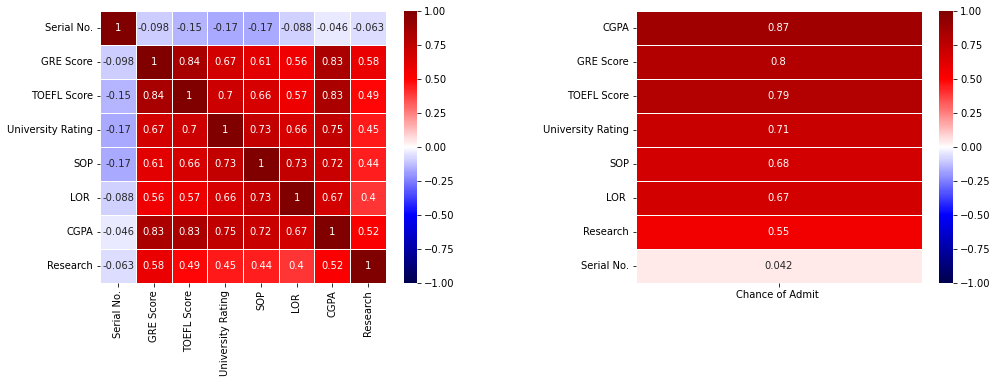

In [7]:
_, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.heatmap(data.drop('Chance of Admit ', axis=1).corr(), annot=True, vmin=-1, vmax=1, cmap='seismic', linewidth=1, ax=axes[0])
sns.heatmap(pd.DataFrame(data.corr()['Chance of Admit '].sort_values(ascending=False)[1:]), 
            annot=True, vmin=-1, vmax=1, cmap='seismic', linewidth=1, ax=axes[1])
plt.subplots_adjust(wspace=0.5)
plt.show()

Выше представлены матрица корреляций признаков между собой и матрица корреляции между признаками и прогнозируемой величиной.

Из значений второй матрицы видим, что признак `Serial No.` не оказывает никакого влияния на прогнозируемую величину `Chance of Admit `. Также видно, что остальные признаки имеют положительную связь с прогнозируемым.

Из значений первой матрицы видим крайне высокую корреляцию между следующими парами признаков:
- `TOEFL Score` и `GRE Score`
- `CGPA` и `GRE Score`
- `CGPA` и `TOEFL Score`

Так как одновременное использование этих пар признаков в моделях машинного обучения привело бы к мультиколлинеарности, следует оставить только один признак из этого множества. Вторая матрица демонстрирует, что наибольшая связь наблюдается между прогнозируемой величиной и признаком `CGPA`, поэтому логичнее оставить именно его, так как его вклад в модель обучения будет наибольшим. 

Таким образом, в результате корреляционного анализа было принято решение в первую очередь пробовать использовать в моделях машинного обучения для прогноза величины `Chance of Admit ` все признаки, кроме `Serial No.`, `GRE Score`, `TOEFL Score`.

In [21]:
best_params = ['University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

## Выбор метрик и подготовка данных

Так как выполняется задача регрессии, были выбраны три самые популярные метрики:
- mean absolute error;
- mean squared error;
- R^2.

In [8]:
def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

In [22]:
y = data['Chance of Admit ']
X = data[best_params]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

## SVR

### Масштабирование данных

In [35]:
scaler = MinMaxScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

,University Rating,SOP,LOR,CGPA,Research
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.528571,0.612500,0.623661,0.575378,0.539286
std,0.284903,0.246753,0.221362,0.188592,0.499347
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.375000,0.500000,0.435897,0.000000
50%,0.500000,0.625000,0.625000,0.580128,1.000000
75%,0.750000,0.750000,0.750000,0.718750,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Базовая модель

In [36]:
svm_model = SVR()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

R^2: 0.722407460442392
MSE: 0.005828949832861664
MAE: 0.062375091127583444


### Подбор гиперпараметров

In [37]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.1), np.arange(2, 15, 1)])}
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='r2')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)

{'C': 0.8}


### Лучшая модель

In [38]:
best_svm_model = grid_cv.best_estimator_
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

R^2: 0.7195686565188096
MSE: 0.005888559668494364
MAE: 0.06295056741630337


## RandomForestRegressor

### Базовая модель

In [39]:
rfc_model = RandomForestRegressor()
rfc_model.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

R^2: 0.7090147991119071
MSE: 0.006110171911626149
MAE: 0.056513493055555516


### Подбор гиперпараметров

In [41]:
params = {'n_estimators': [100, 1000], 'criterion': ['squared_error', 'absolute_error', 'poisson'], 
          'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 3, 5]}
grid_cv = GridSearchCV(estimator=rfc_model, param_grid=params, cv=10, n_jobs=-1, scoring='r2')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

{'criterion': 'absolute_error', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}


### Лучшая модель

In [42]:
best_rfc_model = grid_cv.best_estimator_
best_rfc_model.fit(x_train, y_train)
y_pred_rfc = best_rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

R^2: 0.7099770489829831
MSE: 0.006089966374999991
MAE: 0.055234166666666584


## Сравнение результатов

In [45]:
print("SVR result\n")
print_metrics(y_test, y_pred_svm)

SVR result

R^2: 0.7195686565188096
MSE: 0.005888559668494364
MAE: 0.06295056741630337


In [46]:
print("RandomForestRegressor result\n")
print_metrics(y_test, y_pred_rfc)

RandomForestRegressor result

R^2: 0.7099770489829831
MSE: 0.006089966374999991
MAE: 0.055234166666666584


## Вывод

На основании двух метрик (R^2, MSE) из трёх используемых, лучшим оказался метод опорных векторов. На основании метрики MAE лучшей оказалась модель случайного леса. Метрики показывают, что обе модели имеют довольно хорошее качество. Метод опорных векторов оказался лучшим, но с небольшим отрывом.